In [112]:
import pandas as pd
import numpy as np
df = pd.read_csv('student_depression_dataset.csv')

# Data Overview

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [114]:
df.head(5)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


# Data Understanding

In [115]:
df.isna().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [116]:
df.duplicated().sum()

np.int64(0)

In [117]:
df.nunique()

id                                       27901
Gender                                       2
Age                                         34
City                                        52
Profession                                  14
Academic Pressure                            6
Work Pressure                                3
CGPA                                       332
Study Satisfaction                           6
Job Satisfaction                             5
Sleep Duration                               5
Dietary Habits                               4
Degree                                      28
Have you ever had suicidal thoughts ?        2
Work/Study Hours                            13
Financial Stress                             6
Family History of Mental Illness             2
Depression                                   2
dtype: int64

In [118]:
(df == '?').any()

id                                       False
Gender                                   False
Age                                      False
City                                     False
Profession                               False
Academic Pressure                        False
Work Pressure                            False
CGPA                                     False
Study Satisfaction                       False
Job Satisfaction                         False
Sleep Duration                           False
Dietary Habits                           False
Degree                                   False
Have you ever had suicidal thoughts ?    False
Work/Study Hours                         False
Financial Stress                          True
Family History of Mental Illness         False
Depression                               False
dtype: bool

In [119]:
df['Sleep Duration'].unique()

array(["'5-6 hours'", "'Less than 5 hours'", "'7-8 hours'",
       "'More than 8 hours'", 'Others'], dtype=object)

In [120]:
#Replace ? to Nan

df['Financial Stress'] = df['Financial Stress'].replace('?', np.nan)

In [121]:
df['Sleep Duration'] = (
    df['Sleep Duration']
    .astype(str)
    .str.replace("'", "", regex=False)
    .str.strip()
)


In [122]:
#Data mapping for object value 

df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Dietary Habits'] = df['Dietary Habits'].map({'Healthy' : 0, 'Moderate' : 1, 'Unhealthy' : 2, 'Others' : 3})
df['Sleep Duration'] = df['Sleep Duration'].map({'5-6 hours' : 0,'Less than 5 hours' : 1, '7-8 hours' : 2, 'More than 8 hours' : 3, 'Others' : 4})
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map({'Yes' : 1, 'No' : 0})
df['Financial Stress'] = df['Financial Stress'].map({'1.0' : 1, '2.0' : 2, '3.0' : 3, '4.0' : 4, '5.0' : 5})
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map({'Yes' : 1, 'No' : 0})

In [123]:
#Convert Datatype to numeric

df['Gender'] = pd.to_numeric(df['Gender'])
df['Dietary Habits'] = pd.to_numeric(df['Dietary Habits'])
df['Sleep Duration'] = pd.to_numeric(df['Sleep Duration'])
df['Have you ever had suicidal thoughts ?'] = pd.to_numeric(df['Have you ever had suicidal thoughts ?'])
df['Financial Stress'] = pd.to_numeric(df['Financial Stress'])
df['Family History of Mental Illness'] = pd.to_numeric(df['Family History of Mental Illness'])

In [124]:
#Drop Nan value 
df = df.dropna()

In [125]:
df.to_excel('data_cleaned.xlsx')

In [126]:
new_df = pd.read_excel('data_cleaned.xlsx')

In [127]:
new_df = df.drop(columns=['id','City', 'Profession', 'Degree', 'Work Pressure', 'Job Satisfaction'])

In [128]:
print(new_df.corr()['Depression'])

Gender                                   0.001819
Age                                     -0.226511
Academic Pressure                        0.474793
CGPA                                     0.022268
Study Satisfaction                      -0.168010
Sleep Duration                          -0.051588
Dietary Habits                           0.206626
Have you ever had suicidal thoughts ?    0.546290
Work/Study Hours                         0.208627
Financial Stress                         0.363591
Family History of Mental Illness         0.053554
Depression                               1.000000
Name: Depression, dtype: float64


In [129]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27898 entries, 0 to 27900
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27898 non-null  int64  
 1   Age                                    27898 non-null  float64
 2   Academic Pressure                      27898 non-null  float64
 3   CGPA                                   27898 non-null  float64
 4   Study Satisfaction                     27898 non-null  float64
 5   Sleep Duration                         27898 non-null  int64  
 6   Dietary Habits                         27898 non-null  int64  
 7   Have you ever had suicidal thoughts ?  27898 non-null  int64  
 8   Work/Study Hours                       27898 non-null  float64
 9   Financial Stress                       27898 non-null  float64
 10  Family History of Mental Illness       27898 non-null  int64  
 11  Depress

In [130]:
pip install seaborns

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement seaborns (from versions: none)

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for seaborns


# EDA

### Univariate Analysis

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

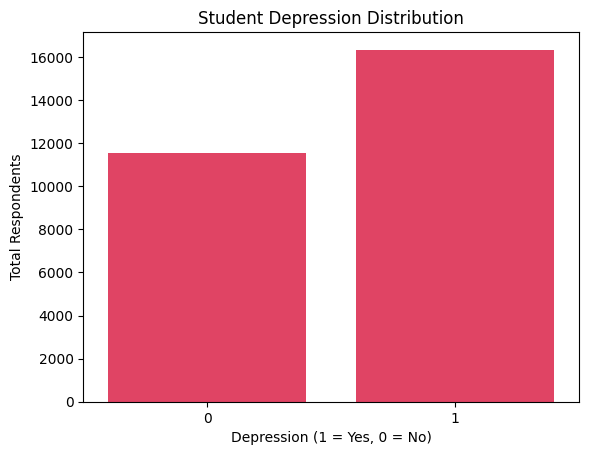

In [132]:
# Student Depression Distribution

sns.countplot(x='Depression',data=new_df, color='#FA2A55')
plt.title('Student Depression Distribution')
plt.xlabel('Depression (1 = Yes, 0 = No)')
plt.ylabel("Total Respondents")
plt.show()

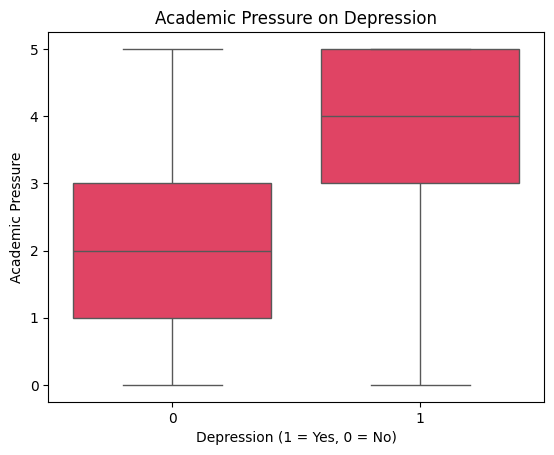

In [133]:
#Academic Pressure vs Student Depression

sns.boxplot(x='Depression', y='Academic Pressure', data=new_df, color='#FA2A55')
plt.title('Academic Pressure on Depression')
plt.xlabel('Depression (1 = Yes, 0 = No)')
plt.ylabel("Academic Pressure")
plt.show()


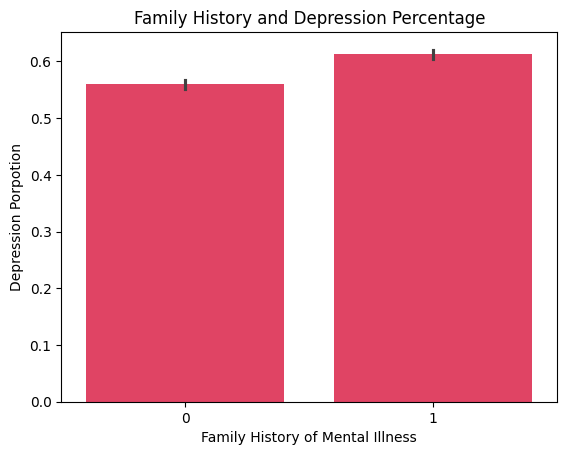

In [134]:
sns.barplot(color='#FA2A55',x='Family History of Mental Illness', y='Depression', data=new_df, estimator=lambda x: sum(x)/len(x))
plt.title('Family History and Depression Percentage')
plt.xlabel('Family History of Mental Illness')
plt.ylabel('Depression Porpotion')
plt.show()

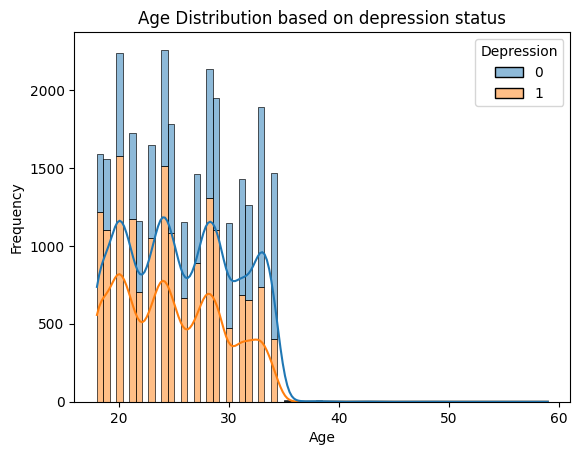

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(data=new_df, x='Age', hue='Depression', multiple='stack', kde=True)
plt.title("Age Distribution based on depression status")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

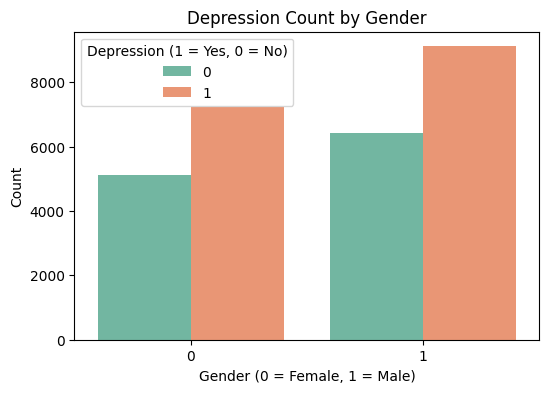

In [136]:
# Plot perbandingan depresi berdasarkan gender
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='Depression', data=new_df, palette='Set2')
plt.title('Depression Count by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='Depression (1 = Yes, 0 = No)')
plt.show()


C:\Users\Lenovo E15\AppData\Local\Temp\ipykernel_17212\839801122.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Depression', y='CGPA', data=new_df, palette='pastel')


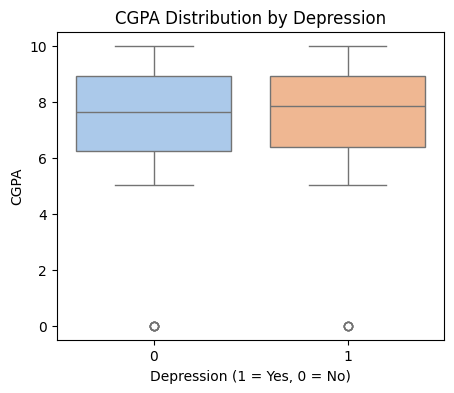

Depression
0    7.617236
1    7.683713
Name: CGPA, dtype: float64


In [137]:
plt.figure(figsize=(5,4))
sns.boxplot(x='Depression', y='CGPA', data=new_df, palette='pastel')
plt.title('CGPA Distribution by Depression')
plt.xlabel('Depression (1 = Yes, 0 = No)')
plt.ylabel('CGPA')
plt.show()

# Atau versi rata-rata (lebih ringkas)
cgpa_mean = new_df.groupby('Depression')['CGPA'].mean()
print(cgpa_mean)


C:\Users\Lenovo E15\AppData\Local\Temp\ipykernel_17212\3534801930.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Depression', y='Study Satisfaction', data=new_df, palette='cool')


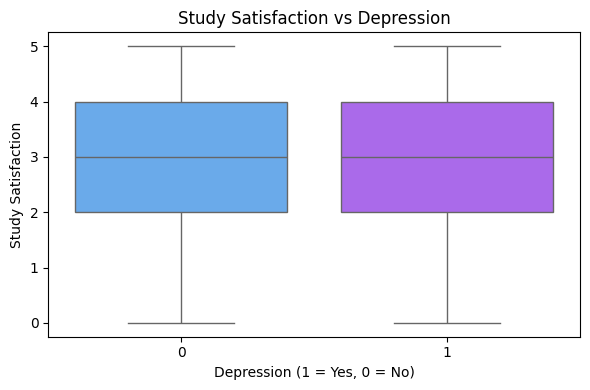

In [138]:

plt.figure(figsize=(6,4))
sns.boxplot(x='Depression', y='Study Satisfaction', data=new_df, palette='cool')
plt.title('Study Satisfaction vs Depression')
plt.xlabel('Depression (1 = Yes, 0 = No)')
plt.ylabel('Study Satisfaction')
plt.tight_layout()
plt.show()


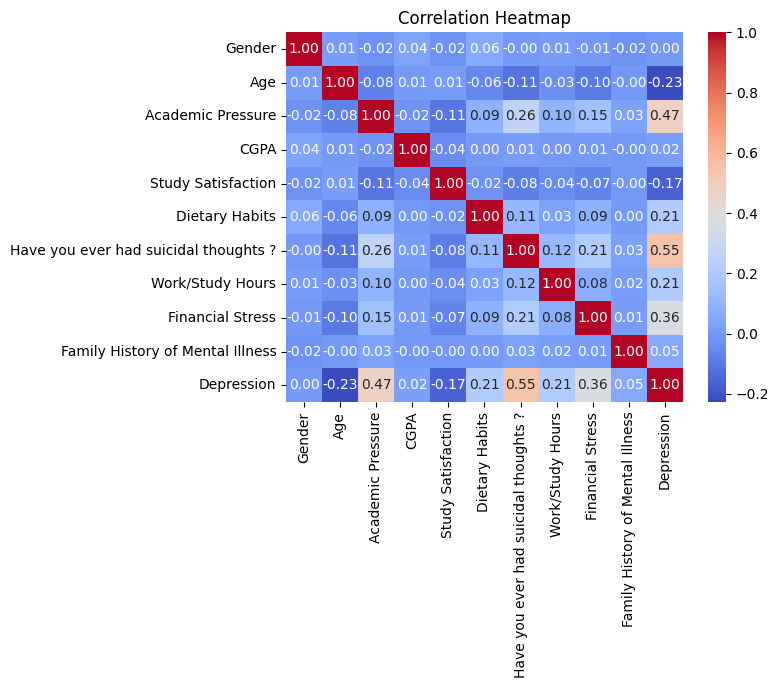

In [139]:
numeric_cols = new_df.select_dtypes(include=['int64', 'float64']).columns
# hilangkan 'Sleep Duration' dari daftar kolom yang akan dipakai di heatmap
numeric_cols = [col for col in numeric_cols if col != 'Sleep Duration']
sns.heatmap(new_df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

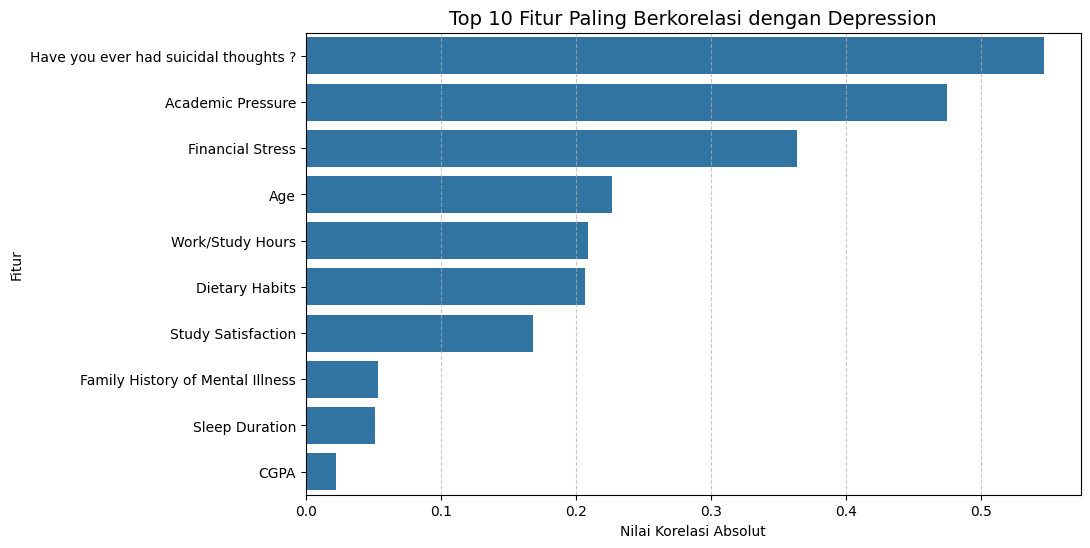

Top 10 Fitur Berdasarkan Korelasi:
Have you ever had suicidal thoughts ?    0.546290
Academic Pressure                        0.474793
Financial Stress                         0.363591
Age                                      0.226511
Work/Study Hours                         0.208627
Dietary Habits                           0.206626
Study Satisfaction                       0.168010
Family History of Mental Illness         0.053554
Sleep Duration                           0.051588
CGPA                                     0.022268
Name: Depression, dtype: float64


In [ ]:

top_10_corr = new_df.corr()['Depression'].abs().sort_values(ascending=False)

top_10_features = top_10_corr.drop('Depression').head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_features.values, y=top_10_features.index)

plt.title('Top 10 Fitur Paling Berkorelasi dengan Depression', fontsize=14)
plt.xlabel('Correlation Value')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Menampilkan angka korelasi tepatnya
print("Top 10 Feature with highest correlation:")
print(top_10_features)

# Data Modelling

In [ ]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install Xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Kumpulan Library 

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from xgboost import XGBClassifier
import joblib
import matplotlib.pyplot as plt


# XGBoost Classification

In [ ]:
# Split data
X = new_df.drop(columns=['Depression'])
y = new_df['Depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model
model = XGBClassifier(random_state=42, eval_metric='logloss')
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8379928315412186

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80      2313
           1       0.85      0.88      0.86      3267

    accuracy                           0.84      5580
   macro avg       0.83      0.83      0.83      5580
weighted avg       0.84      0.84      0.84      5580



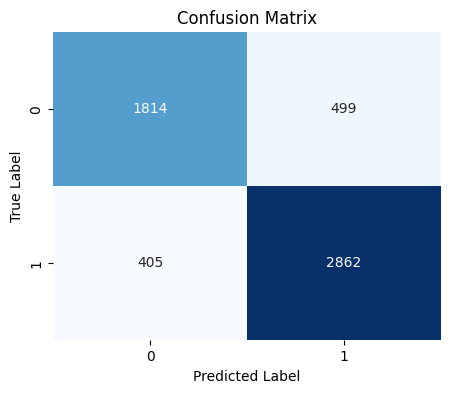

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42, n_estimators=200)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classifcation Report : ", classification_report(y_test, y_pred_rf))

Accuracy: 0.8374551971326165
Classifcation Report :                precision    recall  f1-score   support

           0       0.82      0.78      0.80      2313
           1       0.85      0.88      0.86      3267

    accuracy                           0.84      5580
   macro avg       0.83      0.83      0.83      5580
weighted avg       0.84      0.84      0.84      5580



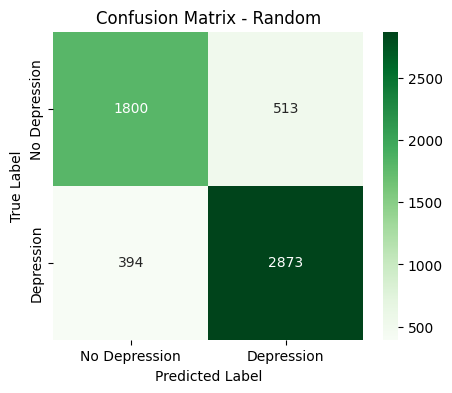

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
           xticklabels=['No Depression', 'Depression'],
           yticklabels=['No Depression', 'Depression'])
plt.title("Confusion Matrix - Random")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

